In [28]:
import os
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt

In [29]:
file_path = './dataset/solar_245567.csv'
df = pd.read_csv(file_path, delimiter=',', decimal='.')

In [30]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17016 entries, 0 to 17015
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    17016 non-null  int64  
 1   raw          17016 non-null  float64
 2   temperature  17016 non-null  float64
 3   modified1    15825 non-null  float64
 4   modified2    15641 non-null  float64
 5   modified3    15879 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 797.8 KB
None
          timestamp            raw   temperature      modified1  \
count  1.701600e+04   17016.000000  17016.000000   15825.000000   
mean   1.643547e+12   36912.094888      6.609191   36539.102165   
std    1.797037e+10   66907.410347      9.292033   66504.530164   
min    1.612224e+12       0.000000    -24.500000       0.000000   
25%    1.628056e+12       0.000000     -0.200000       0.000000   
50%    1.643715e+12       0.000000      6.400000       0.000000   
75%    1.659028e+12   38258.01

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17016 entries, 0 to 17015
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    17016 non-null  int64  
 1   raw          17016 non-null  float64
 2   temperature  17016 non-null  float64
 3   modified1    15825 non-null  float64
 4   modified2    15641 non-null  float64
 5   modified3    15879 non-null  float64
dtypes: float64(5), int64(1)
memory usage: 797.8 KB


In [32]:
missing_values = df.isnull().sum()
missing_values

timestamp         0
raw               0
temperature       0
modified1      1191
modified2      1375
modified3      1137
dtype: int64

In [33]:
total_cells = np.product(df.shape)
total_missing = missing_values.sum()

In [34]:
# percent of data that is missing
percent_missing = (total_missing/total_cells) * 100
print(percent_missing,"%")

3.62697853001097 %


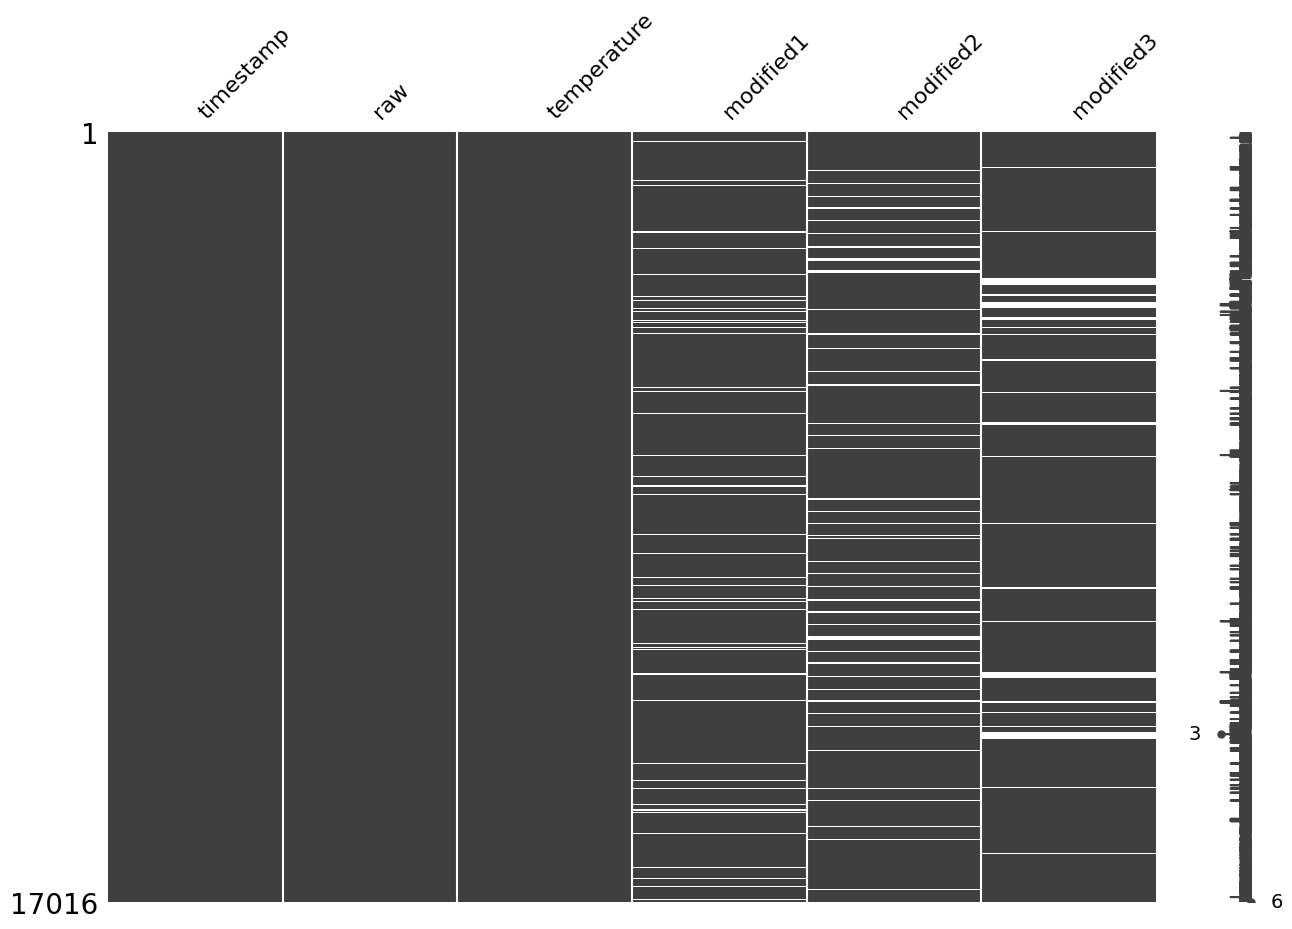

In [35]:
msno.matrix(df, figsize=(15,10))
plt.show();

<Axes: >

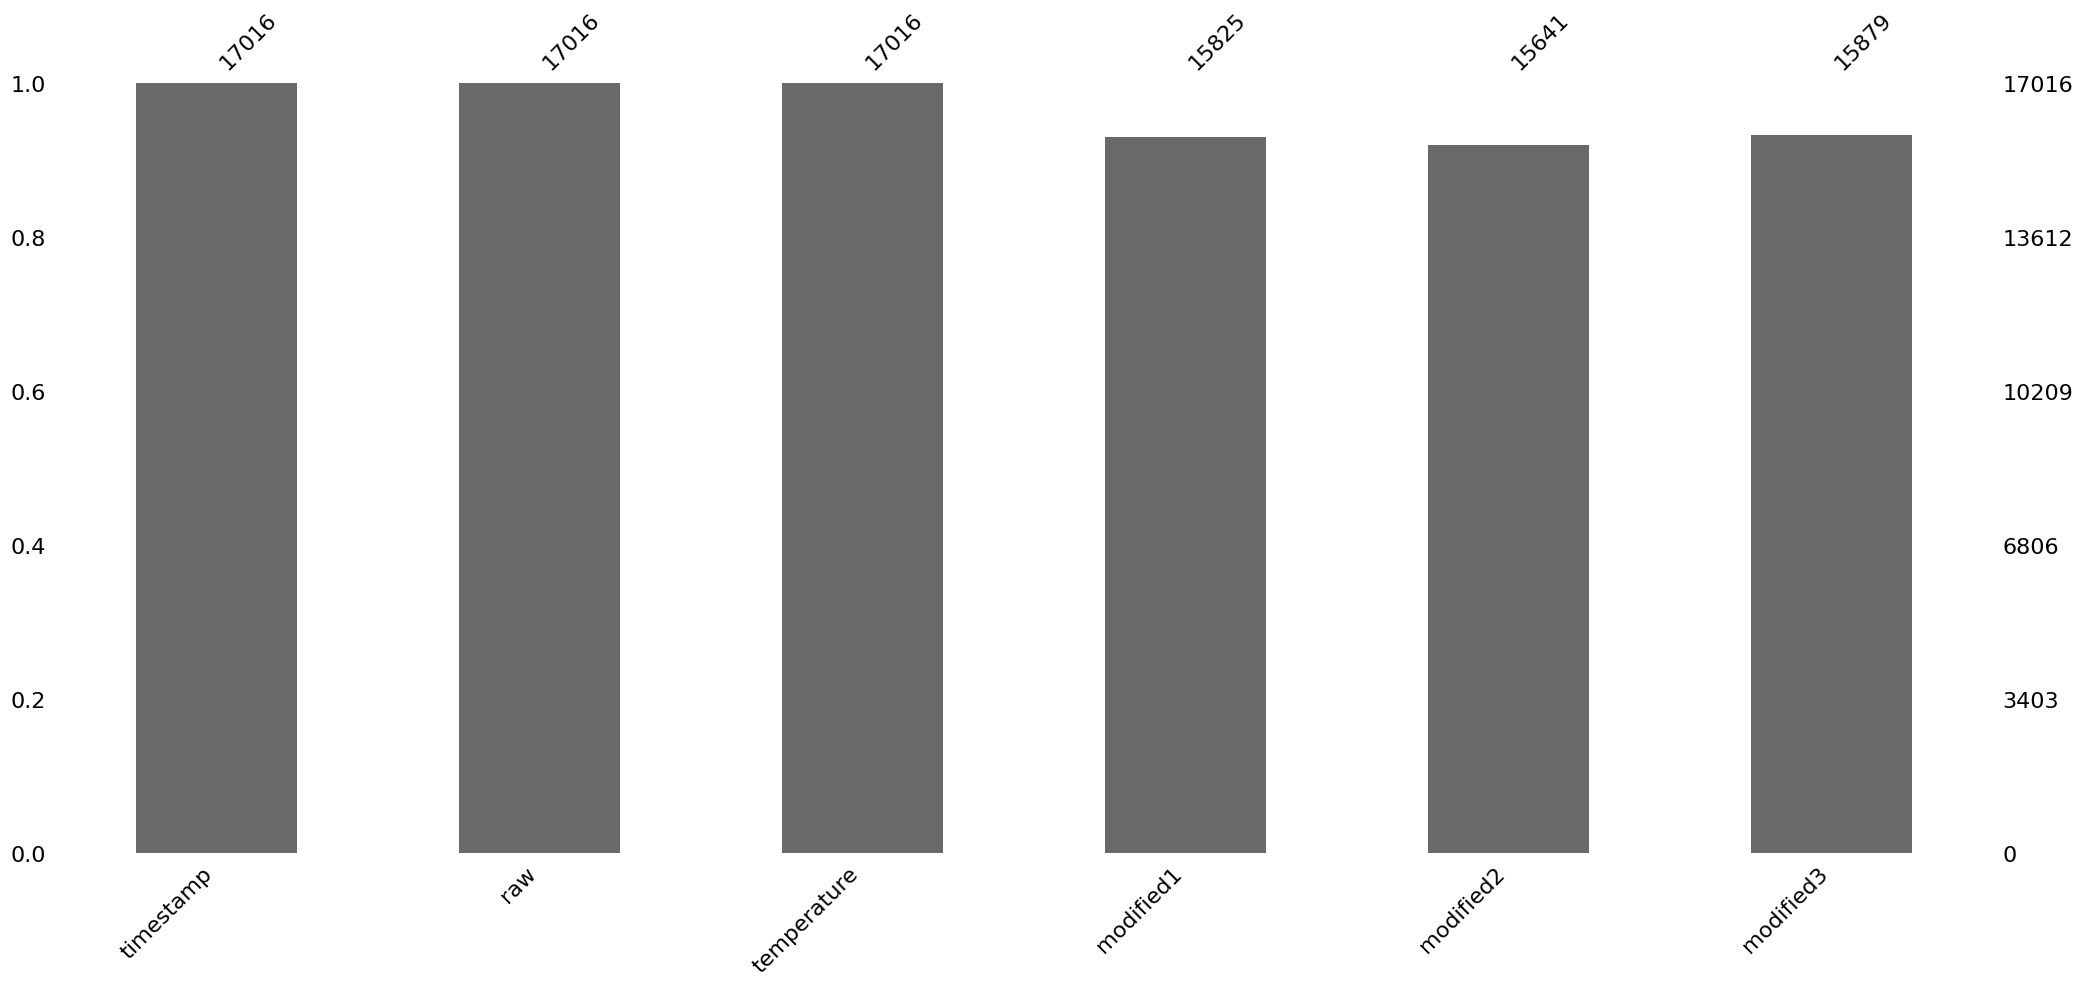

In [36]:
msno.bar(df)

             timestamp       raw  temperature  modified1  modified2  modified3
timestamp     1.000000 -0.091308    -0.046217  -0.091689  -0.089558  -0.084488
raw          -0.091308  1.000000     0.245791   1.000000   1.000000   1.000000
temperature  -0.046217  0.245791     1.000000   0.244605   0.219542   0.196143
modified1    -0.091689  1.000000     0.244605   1.000000   1.000000   1.000000
modified2    -0.089558  1.000000     0.219542   1.000000   1.000000   1.000000
modified3    -0.084488  1.000000     0.196143   1.000000   1.000000   1.000000


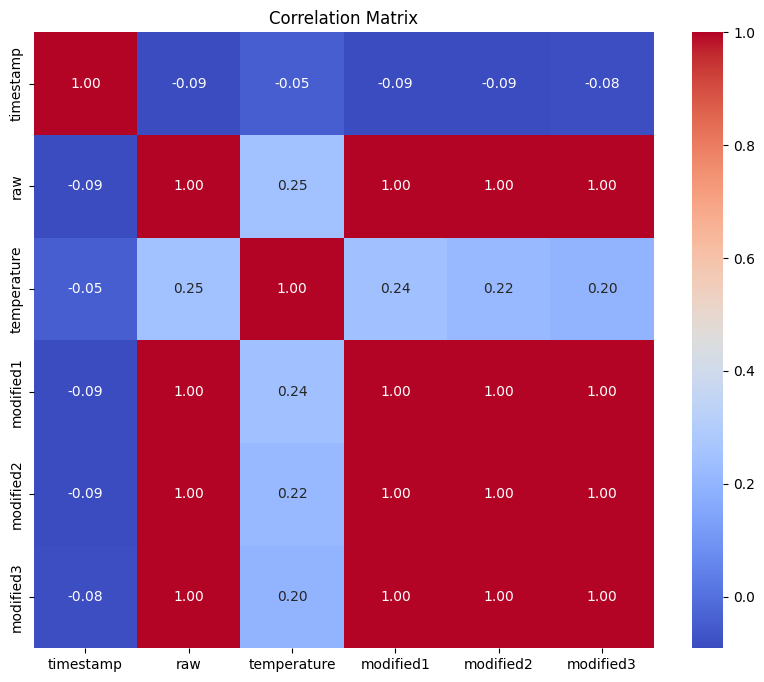

In [37]:
 # Check correlation between modified variables and other relevant variables
correlation_matrix = df.corr()
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [38]:
import pandas as pd
import numpy as np

# Automatically create 10 equal bins based on temperature
num_bins = 10
temperature_min = df['temperature'].min()
temperature_max = df['temperature'].max()

# Create temperature bins
temperature_bins = np.linspace(temperature_min, temperature_max, num_bins + 1)  # +1 for bin edges
temperature_labels = [f'{temperature_bins[i]:.1f}-{temperature_bins[i+1]:.1f}' for i in range(num_bins)]

# Create a new column for temperature bins
df['temp_range'] = pd.cut(df['temperature'], bins=temperature_bins, labels=temperature_labels, include_lowest=True)

# Automatically create 10 equal bins based on raw values
raw_min = df['raw'].min()
raw_max = df['raw'].max()

# Create raw bins
raw_bins = np.linspace(raw_min, raw_max, num_bins + 1)  # +1 for bin edges
raw_labels = [f'{raw_bins[i]:.1f}-{raw_bins[i+1]:.1f}' for i in range(num_bins)]

# Create a new column for raw bins
df['raw_range'] = pd.cut(df['raw'], bins=raw_bins, labels=raw_labels, include_lowest=True)

# Calculate the percentage of missing values for each modified variable by temperature range
missing_percentage_temp = df.groupby('temp_range')[['modified1', 'modified2', 'modified3']].apply(
    lambda x: x.isnull().mean() * 100
).reset_index()

# Rename the columns for clarity
missing_percentage_temp.columns = ['Temperature Range', 'Modified1 Missing %', 'Modified2 Missing %', 'Modified3 Missing %']

# Calculate the percentage of missing values for each modified variable by raw range
missing_percentage_raw = df.groupby('raw_range')[['modified1', 'modified2', 'modified3']].apply(
    lambda x: x.isnull().mean() * 100
).reset_index()

# Rename the columns for clarity
missing_percentage_raw.columns = ['Raw Range', 'Modified1 Missing %', 'Modified2 Missing %', 'Modified3 Missing %']

# Display the results
print("Missing Values by Temperature Range:")
print(missing_percentage_temp)

print("\nMissing Values by Raw Range:")
print(missing_percentage_raw)


Missing Values by Temperature Range:
  Temperature Range  Modified1 Missing %  Modified2 Missing %  \
0       -24.5--19.0            11.111111             0.000000   
1       -19.0--13.6            10.909091            10.909091   
2        -13.6--8.1             7.317073             6.456241   
3         -8.1--2.7             6.124550             3.962944   
4          -2.7-2.8             6.790451             5.358090   
5           2.8-8.3             7.183725             7.406230   
6          8.3-13.7             7.140659             9.602955   
7         13.7-19.2             7.423392             8.761329   
8         19.2-24.6             7.090643            13.523392   
9         24.6-30.1             5.912596            27.249357   

   Modified3 Missing %  
0             0.000000  
1             0.000000  
2             0.000000  
3             0.000000  
4             0.000000  
5             0.000000  
6             0.000000  
7             0.000000  
8            54.678363

/var/folders/25/s3qpsf9n5k9g2htyymdyb8ph0000gn/T/ipykernel_4139/1093106194.py:28: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_percentage_temp = df.groupby('temp_range')[['modified1', 'modified2', 'modified3']].apply(
/var/folders/25/s3qpsf9n5k9g2htyymdyb8ph0000gn/T/ipykernel_4139/1093106194.py:36: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  missing_percentage_raw = df.groupby('raw_range')[['modified1', 'modified2', 'modified3']].apply(


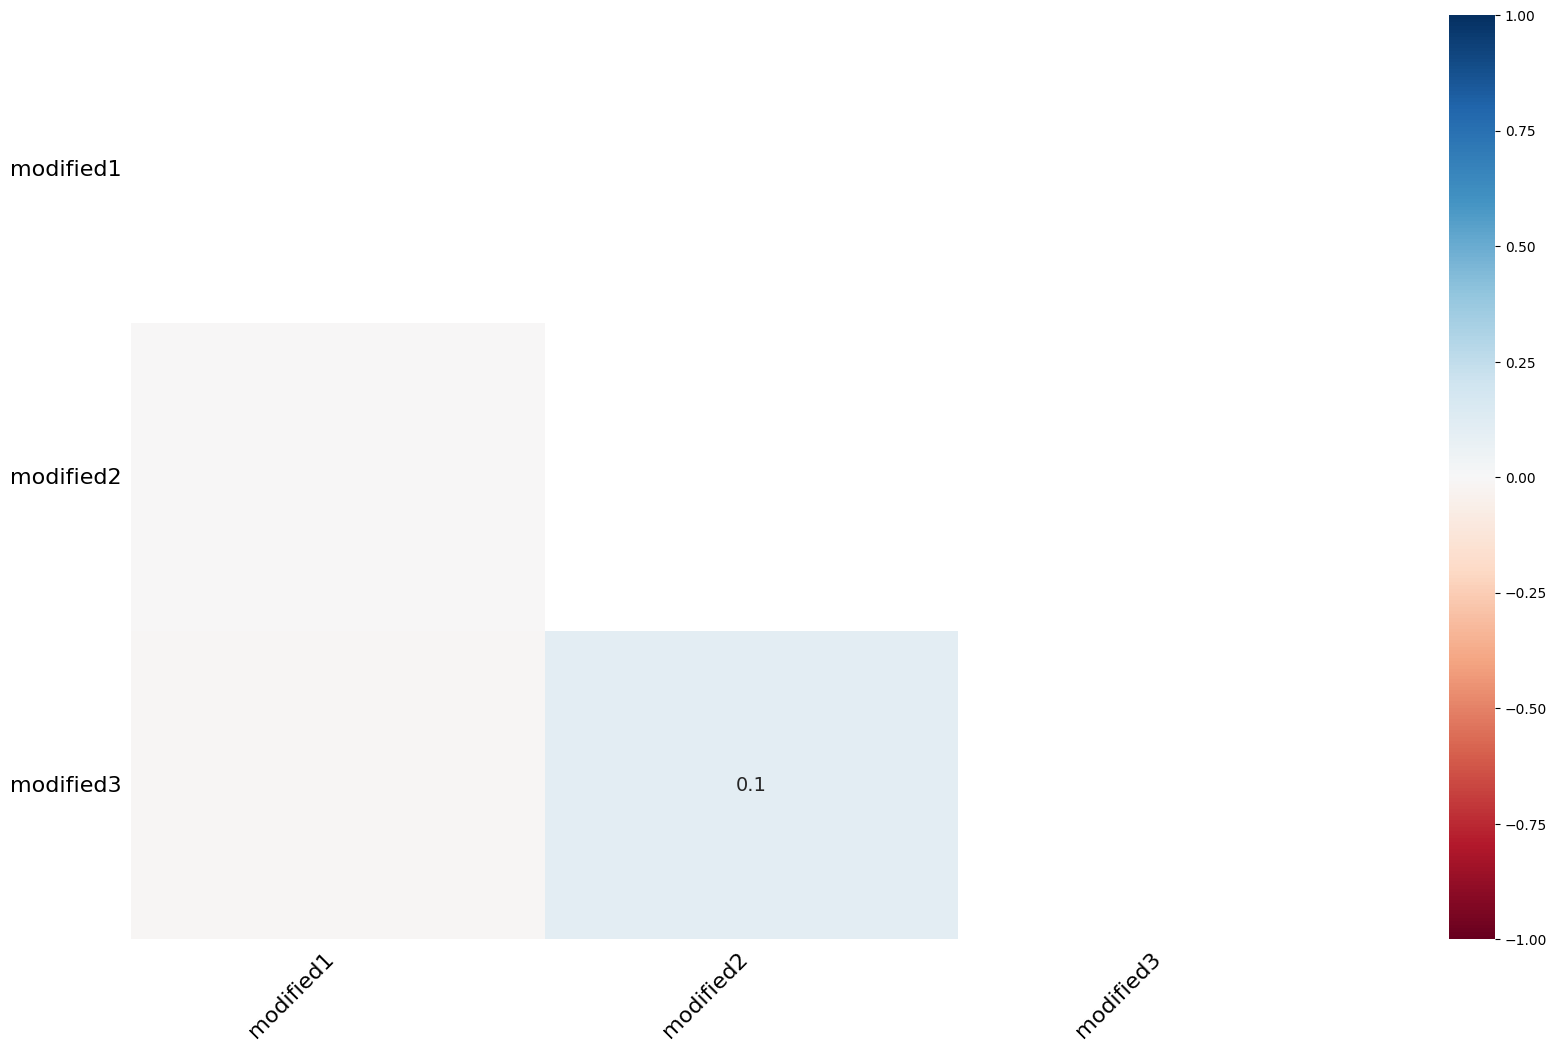

In [39]:
msno.heatmap(df)
plt.show()


In [40]:
df = df.sort_values(by='timestamp', ascending=True)

In [41]:
missing = df[df.isnull()['modified1'] == True]

In [42]:
missing

,timestamp,raw,temperature,modified1,modified2,modified3,temp_range,raw_range
0,1612224000000,0.00,-3.9,NaN,0.00,0.00,-8.1--2.7,0.0-30163.0
48,1612396800000,0.00,-0.3,NaN,0.00,0.00,-2.7-2.8,0.0-30163.0
67,1612465200000,0.00,0.8,NaN,0.00,0.00,-2.7-2.8,0.0-30163.0
72,1612483200000,0.00,-0.2,NaN,0.00,0.00,-2.7-2.8,0.0-30163.0
76,1612497600000,0.00,0.1,NaN,0.00,0.00,-2.7-2.8,0.0-30163.0
...,...,...,...,...,...,...,...,...
16905,1674896400000,41772.33,-2.1,NaN,NaN,41772.33,-2.7-2.8,30163.0-60326.0
16933,1674997200000,1880.47,0.8,NaN,1880.47,1880.47,-2.7-2.8,0.0-30163.0
16960,1675094400000,0.00,0.7,NaN,0.00,0.00,-2.7-2.8,0.0-30163.0
16995,1675220400000,0.00,-2.6,NaN,0.00,0.00,-2.7-2.8,0.0-30163.0


In [43]:
missing = missing.iloc[:, [1, 3]]

In [44]:
missing

,raw,modified1
0,0.00,NaN
48,0.00,NaN
67,0.00,NaN
72,0.00,NaN
76,0.00,NaN
...,...,...
16905,41772.33,NaN
16933,1880.47,NaN
16960,0.00,NaN
16995,0.00,NaN


In [45]:
from sklearn.impute import KNNImputer, SimpleImputer

In [46]:
imputer = KNNImputer(n_neighbors=3)

imputed_values = imputer.fit_transform(df.reset_index()[['modified1', 'modified2', 'modified3']])
imputed_values = pd.DataFrame(imputed_values[:,0])
imputed_values.set_index(df.index, inplace=True)
imputed_values.rename(columns={0: 'mice'}, inplace=True)

In [47]:
missing = missing.join(imputed_values) 

In [48]:
mean_value = df['modified1'].mean()

In [49]:
missing['mean'] = mean_value

In [50]:
missing

,raw,modified1,mice,mean
0,0.00,NaN,0.000000,36539.102165
48,0.00,NaN,0.000000,36539.102165
67,0.00,NaN,0.000000,36539.102165
72,0.00,NaN,0.000000,36539.102165
76,0.00,NaN,0.000000,36539.102165
...,...,...,...,...
16905,41772.33,NaN,41753.313333,36539.102165
16933,1880.47,NaN,1881.133333,36539.102165
16960,0.00,NaN,0.000000,36539.102165
16995,0.00,NaN,0.000000,36539.102165


In [51]:
rmse_mice = np.sqrt(((missing['raw'] - missing['mice']) ** 2).mean())
rmse_mean = np.sqrt(((missing['raw'] - missing['mean']) ** 2).mean())

rmse_mice, rmse_mean

(16344.582142085743, 72060.50021227659)

In [52]:
# Annahme: Das DataFrame "missing" enthält die tatsächlichen Werte.
# Das ursprüngliche DataFrame "df" wird umbenannt, um mit den realen Daten zu arbeiten

# Verwenden von "missing" als DataFrame-Name für die Berechnung von R²

# Berechnung des Bestimmtheitsmaßes (R²) für die Spalten "mice" und "mean" im Vergleich zur "raw" Spalte
ss_total = ((missing['raw'] - missing['raw'].mean()) ** 2).sum()  # Gesamtvarianz der "raw"-Spalte
ss_res_mice = ((missing['raw'] - missing['mice']) ** 2).sum()     # Residualsumme der Quadrate für "mice"
ss_res_mean = ((missing['raw'] - missing['mean']) ** 2).sum()     # Residualsumme der Quadrate für "mean"

r2_mice = 1 - (ss_res_mice / ss_total)
r2_mean = 1 - (ss_res_mean / ss_total)

r2_mice, r2_mean


(0.9482709243984475, -0.005498943047085314)

In [53]:
import numpy as np
import pandas as pd


# Function to calculate MAE and RMSE
def calculate_metrics(raw, imputed):
    # Drop NaN values for comparison
    mask = ~np.isnan(imputed)
    mae = np.mean(np.abs(raw[mask] - imputed[mask]))
    rmse = np.sqrt(np.mean((raw[mask] - imputed[mask]) ** 2))
    return mae, rmse

# Calculate metrics for each imputed dataset
mae_mice, rmse_mice = calculate_metrics(missing['raw'], missing['mice'])
mae_mean, rmse_mean = calculate_metrics(missing['raw'], missing['mean'])

# Calculate errors
abs_errors_mice = np.abs(missing['raw'] - missing['mice'])
abs_errors_mean = np.abs(missing['raw'] - missing['mean'])
squared_errors_mice = (missing['raw'] - missing['mice']) ** 2
squared_errors_mean = (missing['raw'] - missing['mean']) ** 2

# Mask for non-NaN values
mask_mice = ~np.isnan(missing['mice'])
mask_mean = ~np.isnan(missing['mean'])

# Calculate standard errors
sem_mae_mice = np.std(abs_errors_mice[mask_mice]) / np.sqrt(len(abs_errors_mice[mask_mice]))
sem_mae_mean = np.std(abs_errors_mean[mask_mean]) / np.sqrt(len(abs_errors_mean[mask_mean]))

sem_rmse_mice = np.std(np.sqrt(squared_errors_mice[mask_mice])) / np.sqrt(len(squared_errors_mice[mask_mice]))
sem_rmse_mean = np.std(np.sqrt(squared_errors_mean[mask_mean])) / np.sqrt(len(squared_errors_mean[mask_mean]))

# Present the results
results = pd.DataFrame({
    'Metric': ['MAE', 'RMSE', 'R²'],
    'MICE': [mae_mice, rmse_mice, r2_mice],
    'Mean': [mae_mean, rmse_mean, r2_mean],
    'SEM MICE': [sem_mae_mice, sem_rmse_mice, None],  
    'SEM Mean': [sem_mae_mean, sem_rmse_mean, None]  
})

results


,Metric,MICE,Mean,SEM MICE,SEM Mean
0,MAE,1607.512932,52762.339194,471.310647,1422.162133
1,RMSE,16344.582142,72060.500212,471.310647,1422.162133
2,R²,0.948271,-0.005499,NaN,NaN


In [54]:
from math import sqrt
from sklearn.metrics import mean_squared_error 

In [55]:
# Assuming df is your existing DataFrame and you have already created the 'datetime' column
df['datetime'] = pd.to_datetime(df['timestamp'], unit='ms')

# Reorder the columns to move 'datetime' to the second position
# Get the list of columns
cols = list(df.columns)

# Remove 'datetime' from its current position
cols.remove('datetime')

# Insert 'datetime' at the second position (index 1)
cols.insert(1, 'datetime')

# Reindex the DataFrame
df = df[cols]


In [56]:
df

,timestamp,datetime,raw,temperature,modified1,modified2,modified3,temp_range,raw_range
0,1612224000000,2021-02-02 00:00:00,0.0,-3.9,NaN,0.0,0.0,-8.1--2.7,0.0-30163.0
1,1612227600000,2021-02-02 01:00:00,0.0,-3.5,0.0,0.0,0.0,-8.1--2.7,0.0-30163.0
2,1612231200000,2021-02-02 02:00:00,0.0,-3.0,0.0,0.0,0.0,-8.1--2.7,0.0-30163.0
3,1612234800000,2021-02-02 03:00:00,0.0,-2.6,0.0,0.0,0.0,-2.7-2.8,0.0-30163.0
4,1612238400000,2021-02-02 04:00:00,0.0,-2.4,0.0,0.0,0.0,-2.7-2.8,0.0-30163.0
...,...,...,...,...,...,...,...,...,...
17011,1675278000000,2023-02-01 19:00:00,0.0,0.0,0.0,0.0,0.0,-2.7-2.8,0.0-30163.0
17012,1675281600000,2023-02-01 20:00:00,0.0,0.1,0.0,0.0,0.0,-2.7-2.8,0.0-30163.0
17013,1675285200000,2023-02-01 21:00:00,0.0,0.1,0.0,0.0,0.0,-2.7-2.8,0.0-30163.0
17014,1675288800000,2023-02-01 22:00:00,0.0,0.2,0.0,0.0,0.0,-2.7-2.8,0.0-30163.0


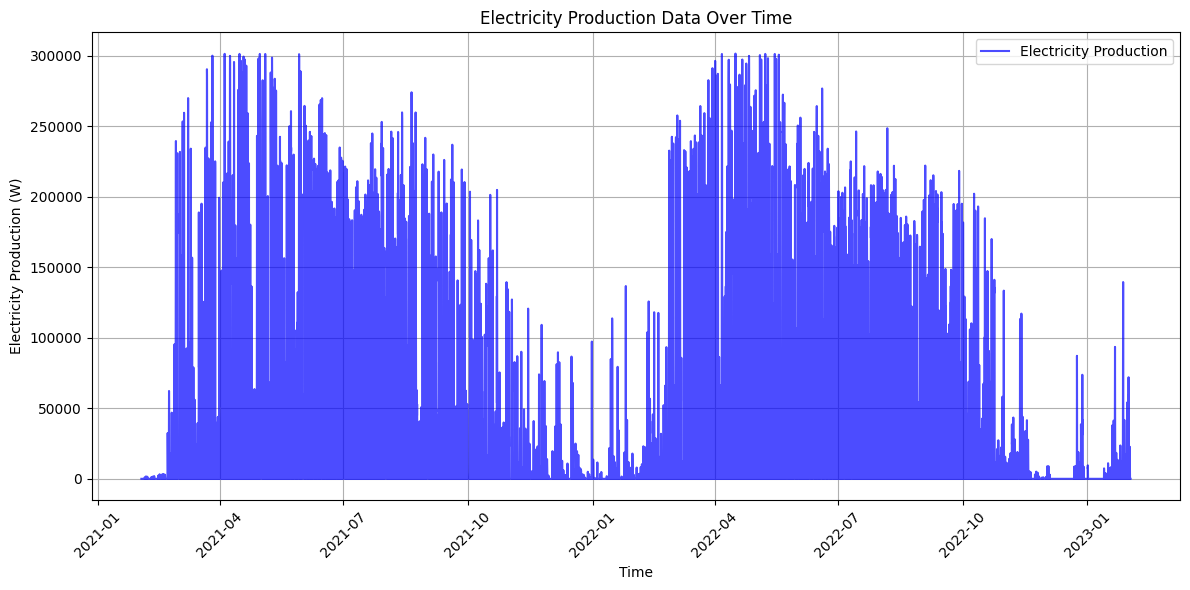

In [57]:
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['raw'], label='Electricity Production', color='blue', alpha=0.7)
plt.title('Electricity Production Data Over Time')
plt.xlabel('Time')
plt.ylabel('Electricity Production (W)')  # Change the unit according to your data
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.grid()
plt.tight_layout()  # Ensures everything is clearly visible
plt.show()

In [58]:
df

,timestamp,datetime,raw,temperature,modified1,modified2,modified3,temp_range,raw_range
0,1612224000000,2021-02-02 00:00:00,0.0,-3.9,NaN,0.0,0.0,-8.1--2.7,0.0-30163.0
1,1612227600000,2021-02-02 01:00:00,0.0,-3.5,0.0,0.0,0.0,-8.1--2.7,0.0-30163.0
2,1612231200000,2021-02-02 02:00:00,0.0,-3.0,0.0,0.0,0.0,-8.1--2.7,0.0-30163.0
3,1612234800000,2021-02-02 03:00:00,0.0,-2.6,0.0,0.0,0.0,-2.7-2.8,0.0-30163.0
4,1612238400000,2021-02-02 04:00:00,0.0,-2.4,0.0,0.0,0.0,-2.7-2.8,0.0-30163.0
...,...,...,...,...,...,...,...,...,...
17011,1675278000000,2023-02-01 19:00:00,0.0,0.0,0.0,0.0,0.0,-2.7-2.8,0.0-30163.0
17012,1675281600000,2023-02-01 20:00:00,0.0,0.1,0.0,0.0,0.0,-2.7-2.8,0.0-30163.0
17013,1675285200000,2023-02-01 21:00:00,0.0,0.1,0.0,0.0,0.0,-2.7-2.8,0.0-30163.0
17014,1675288800000,2023-02-01 22:00:00,0.0,0.2,0.0,0.0,0.0,-2.7-2.8,0.0-30163.0


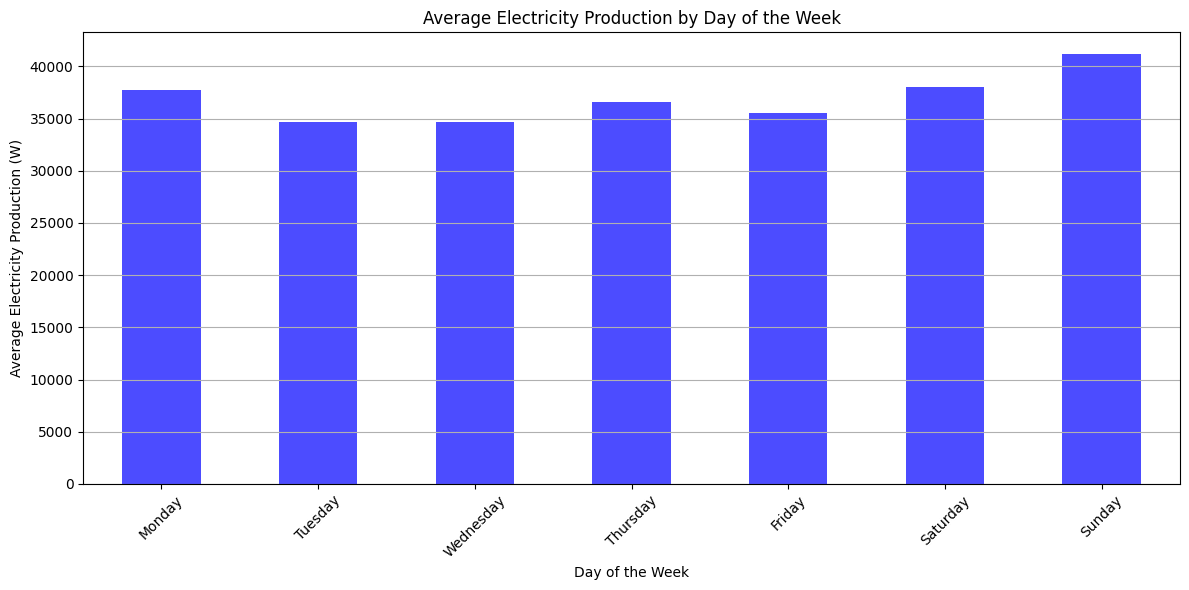

In [59]:
df['day_of_week'] = df['datetime'].dt.day_name()  # Adds a new column with the names of the days

# Calculate the average consumption for each day
avg_consumption = df.groupby('day_of_week')['raw'].mean().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a bar plot
plt.figure(figsize=(12, 6))
avg_consumption.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Average Electricity Production by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Electricity Production (W)')  # Change the unit according to your data
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(axis='y')  # Add grid only on the y-axis for clarity
plt.tight_layout()  # Ensures everything is clearly visible
plt.show()

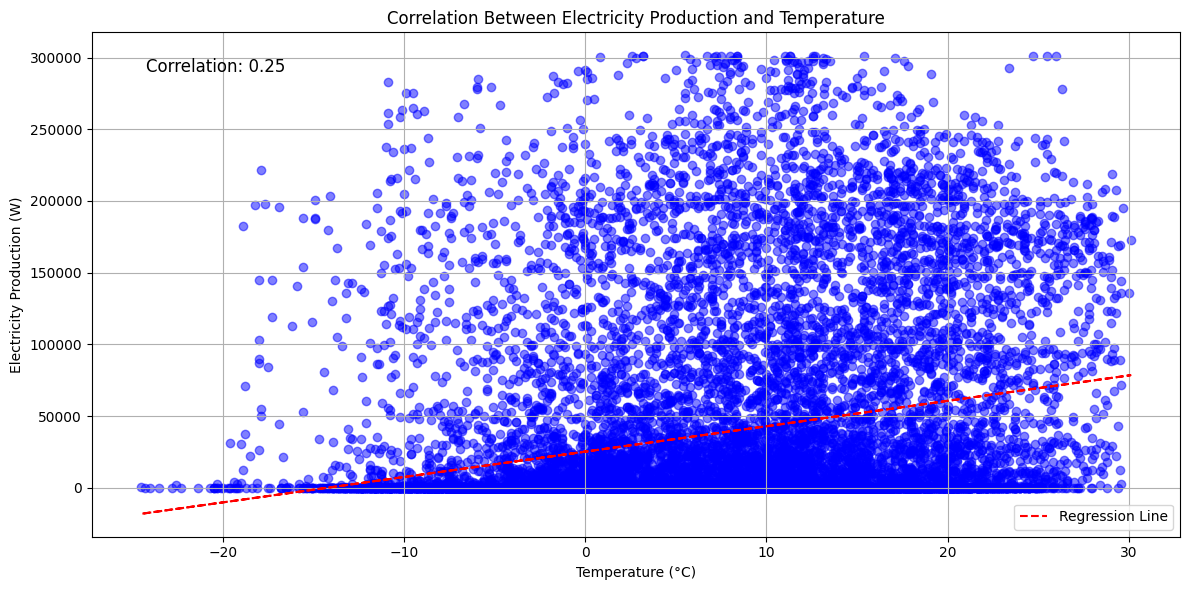

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df is already defined and contains your data
# Calculate the correlation coefficient
correlation = df['raw'].corr(df['temperature'])  # Replace 'temperature' with the actual column name

# Create a scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(df['temperature'], df['raw'], color='blue', alpha=0.5)
plt.title('Correlation Between Electricity Production and Temperature')
plt.xlabel('Temperature (°C)')  # Change the unit according to your data
plt.ylabel('Electricity Production (W)')  # Change the unit according to your data
plt.grid()

# Optionally, add a regression line
m, b = np.polyfit(df['temperature'], df['raw'], 1)  # Linear regression
plt.plot(df['temperature'], m * df['temperature'] + b, color='red', linestyle='--', label='Regression Line')
plt.legend()
plt.text(0.05, 0.95, f'Correlation: {correlation:.2f}', transform=plt.gca().transAxes, fontsize=12, verticalalignment='top')
plt.tight_layout()  # Ensures everything is clearly visible
plt.show()


In [61]:
import seaborn as sns

In [62]:
from scipy import stats

In [63]:
# c. Analyze distribution
# i. Check normality
stat, p = stats.shapiro(df['raw'])
print("\nShapiro-Wilk Test:")
print(f'Statistic={stat:.3f}, p-value={p:.3f}')

# Interpret the p-value
alpha = 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject H0)')
else:
    print('The data is not normally distributed (reject H0)')



Shapiro-Wilk Test:
Statistic=0.623, p-value=0.000
The data is not normally distributed (reject H0)


/Users/tobias/opt/anaconda3/envs/CV2/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17016.
  res = hypotest_fun_out(*samples, **kwds)


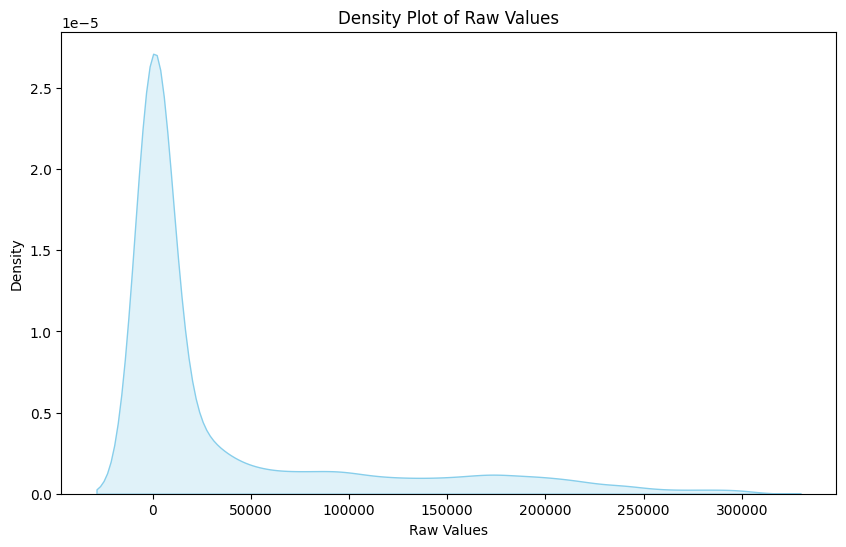

In [64]:
# Create a density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['raw'], fill=True, color='skyblue')
plt.xlabel('Raw Values')
plt.ylabel('Density')
plt.title('Density Plot of Raw Values')
plt.show()

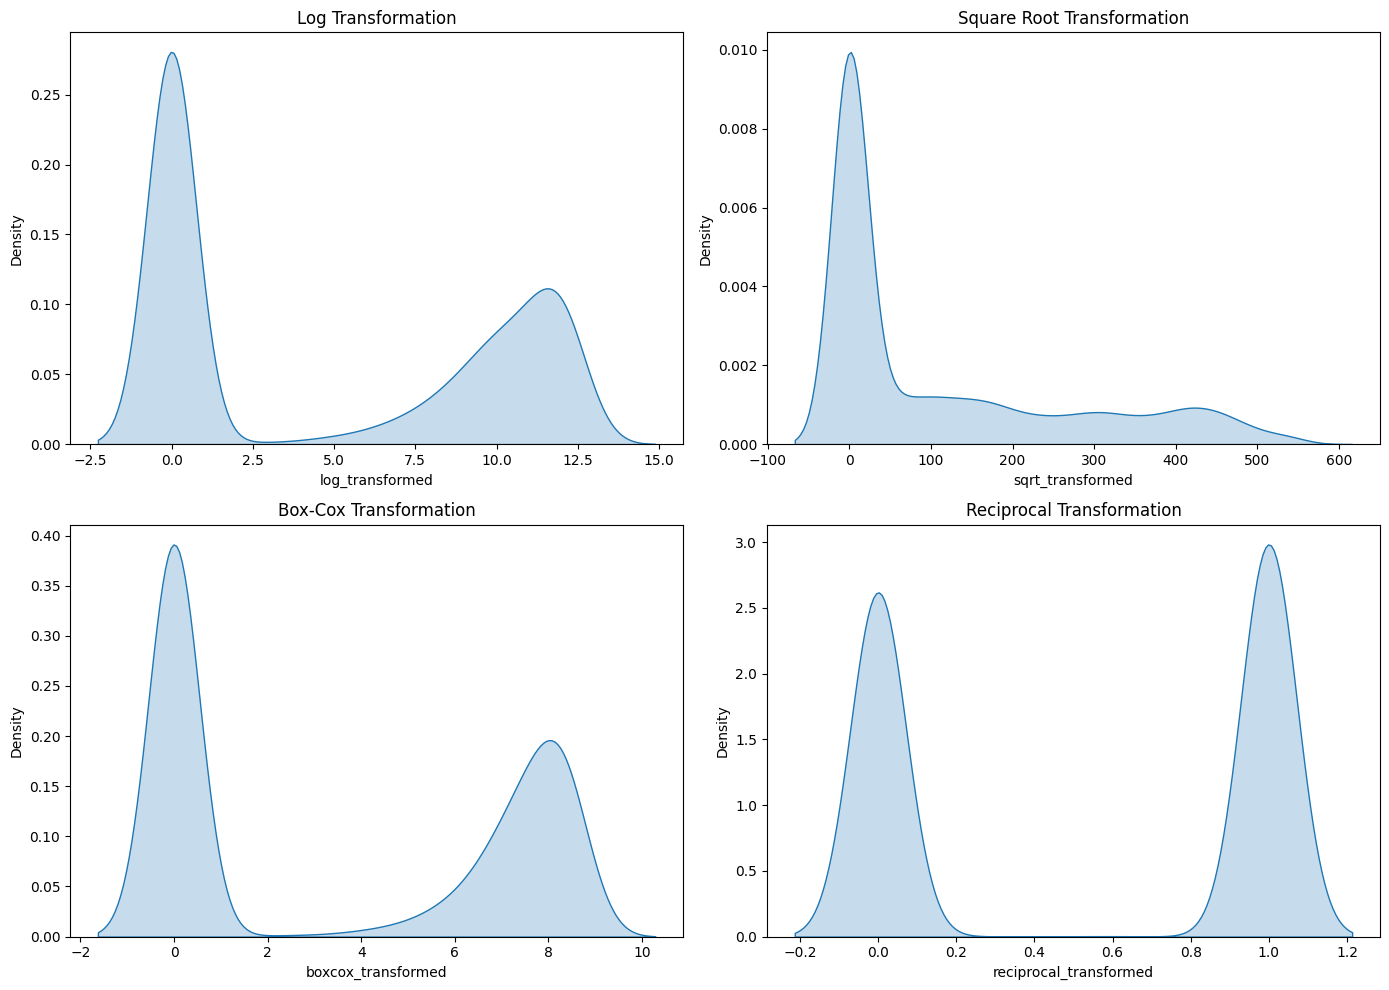

In [65]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Log Transformation (adding 1 to avoid log(0))
df['log_transformed'] = np.log(df['raw'] + 1)

# Square Root Transformation
df['sqrt_transformed'] = np.sqrt(df['raw'])

# Box-Cox Transformation (requires positive values)
df['boxcox_transformed'], _ = stats.boxcox(df['raw'] + 1)  # Adding 1 to avoid issues with zero

# Reciprocal Transformation (avoiding division by zero)
df['reciprocal_transformed'] = 1 / (df['raw'] + 1)

# Plot the distributions for each transformation
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
transformations = ['log_transformed', 'sqrt_transformed', 'boxcox_transformed', 'reciprocal_transformed']
titles = ['Log Transformation', 'Square Root Transformation', 'Box-Cox Transformation', 'Reciprocal Transformation']

for ax, col, title in zip(axes.flatten(), transformations, titles):
    sns.kdeplot(df[col], ax=ax, fill=True)
    ax.set_title(title)
    ax.set_xlabel(col)
    ax.set_ylabel('Density')

plt.tight_layout()
plt.show()


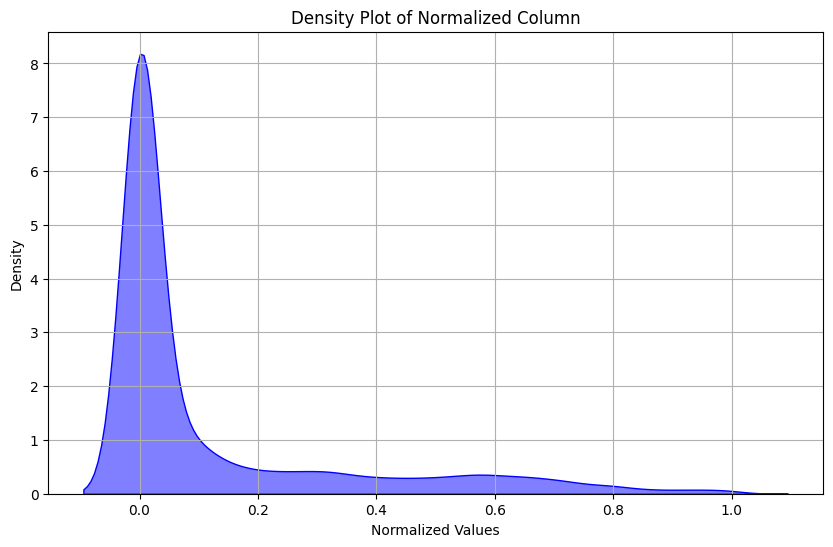

In [66]:
# Normalize the 'raw' column using Min-Max normalization
df['normalized'] = (df['raw'] - df['raw'].min()) / (df['raw'].max() - df['raw'].min())

# Plot the density of the normalized column
plt.figure(figsize=(10, 6))
sns.kdeplot(df['normalized'], fill=True, color='blue', alpha=0.5)
plt.title('Density Plot of Normalized Column')
plt.xlabel('Normalized Values')
plt.ylabel('Density')
plt.grid()
plt.show()